# Predicting Rental Prices in Brazil

Our goals in this kernel are:

- Basic Exploratory Data Analysis.
- Guide on brazilian_houses_to_rent Dataset available on Kaggle.
- Feature Analysis
- Modelling many Models to predict the price of rent

Our dependent variable it is **rent amount (R$)**. This variable it's the price of rental houses in Brazil and its measured in brazilian currency - Reais.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

## Predictive analysis of house rental prices in Brazil

**Some functions for categorize and visualize data**

In [6]:
def categorize(col):
    numerical,category=[],[]
    for i in col:
        if data[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical

In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.displot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.displot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)

    plt.show()
    plt.close()

## Import Dataset

In [7]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [8]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Inicial glances about the data

In [9]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [10]:
df.describe(include = 'object')

,city,floor,animal,furniture
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


In [11]:
df.shape

(10692, 13)

In [12]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


**Inicial observations:**

There are 13 features and 10692 instances
- There are no NaN Values
- Most columns are numerical
- Most houses accept animals
- Most houses are not furnished
- São Paulo is the city with more houses
- There are potencial outliers

## Cleaning the Data

We can see that floor type is 'object', so let's check why

In [14]:
df['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

We can see that are '-' values, so we got to clean that

In [15]:
df.loc[df['floor'] == '-', 'floor'] = 0
df['floor'] = df['floor'].astype('int64')

## Checking for Outliers

<AxesSubplot:>

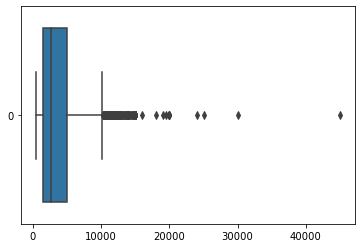

In [16]:
sns.boxplot(data = df['rent amount (R$)'], orient='horizontal')

We can see that are some outliers, so we got treat them

## Dealing with Outliers

In [17]:
# First let make a copy of our dataset so we can separate them.
data = df.copy()

**To treat the outliers we will use the interquartile range and we will perform this analysis in every city**

In [18]:
city_group = data.groupby('city')['rent amount (R$)']

Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)

# IQR = Interquartile Range
IQR = Q3 - Q1

# Limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# DataFrame to store the new data
new_data = pd.DataFrame()

for city in city_group.groups.keys():
    is_city = data['city'] == city
    accepted_limit = ((data['rent amount (R$)'] >= lower[city]) &
                     (data['rent amount (R$)'] <= upper[city]))
    
    select = is_city & accepted_limit
    data_select = data[select]
    new_data = pd.concat([new_data, data_select])
    
data = new_data.copy()

In [19]:
# New dataset
data.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,9974.000000,9974.000000,9974.000000,9974.000000,9974.000000,9.974000e+03,9974.000000,9974.000000,9974.000000,9.974000e+03
mean,134.483958,2.413575,2.101364,1.479848,5.071185,1.101394e+03,3300.496691,315.949469,44.834369,4.762867e+03
std,550.700299,1.120755,1.300777,1.482660,6.051531,1.601059e+04,2497.261703,3198.118033,34.438465,1.665255e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,55.000000,2.000000,1.000000,0.000000,1.000000,1.900000e+02,1500.000000,34.000000,20.000000,1.990000e+03
50%,85.000000,2.000000,2.000000,1.000000,3.000000,5.500000e+02,2500.000000,110.000000,33.000000,3.327000e+03
75%,160.000000,3.000000,3.000000,2.000000,8.000000,1.133000e+03,4233.750000,315.000000,58.000000,5.855250e+03
max,46335.000000,10.000000,10.000000,12.000000,301.000000,1.117000e+06,12000.000000,313700.000000,181.000000,1.120000e+06


We can see that our dataset is now without outliers in our dependent variable

# Exploratory Data Analysis (EDA)

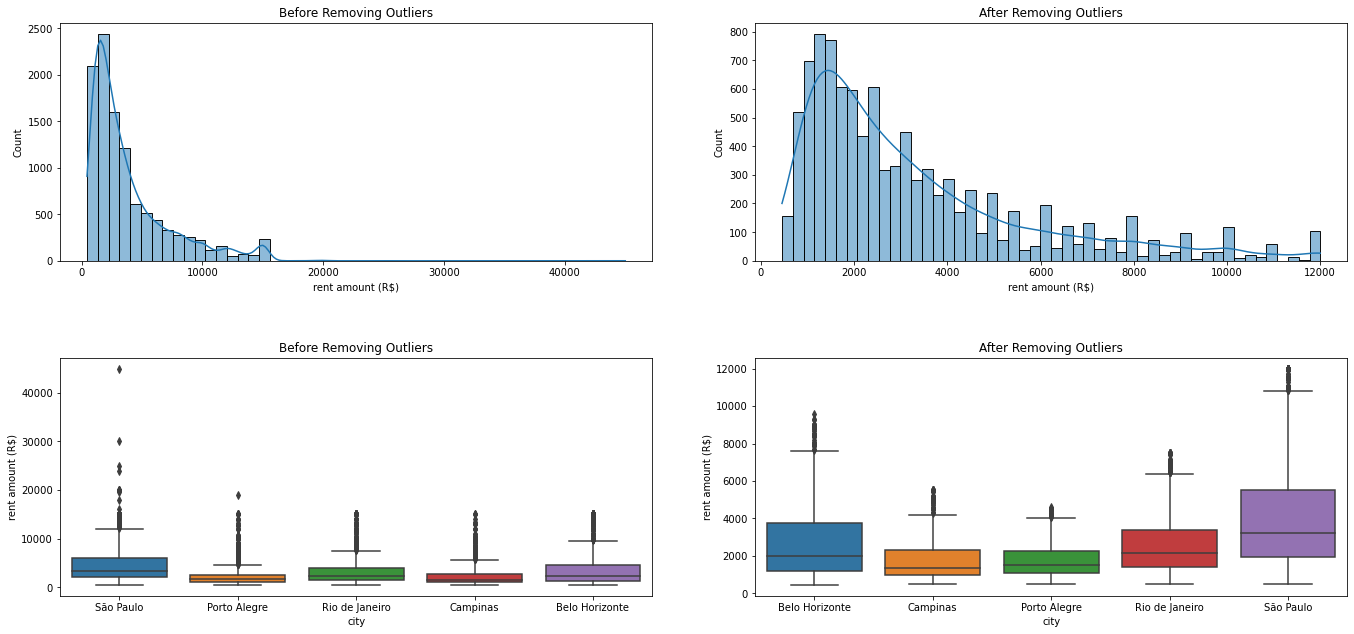

In [40]:
# Lets take a look on how our data was distributed before and after treat outliers

plt.figure(1, figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['rent amount (R$)'], kde=True,bins=50)
plt.title('Before Removing Outliers')
plt.subplot(2, 2, 2)
sns.histplot(data['rent amount (R$)'],kde=True,bins=50)
plt.title('After Removing Outliers')
plt.subplot(2, 2, 3)
plt.figure(1, figsize=(20, 12))
sns.boxplot(x=df['city'], y=df['rent amount (R$)']).set_title('Before Removing Outliers')
plt.subplot(2, 2, 4)
sns.boxplot(x=data['city'], y=data['rent amount (R$)']).set_title('After Removing Outliers')
plt.tight_layout(pad=5.0)
plt.show()

## Lets explore our numerical features

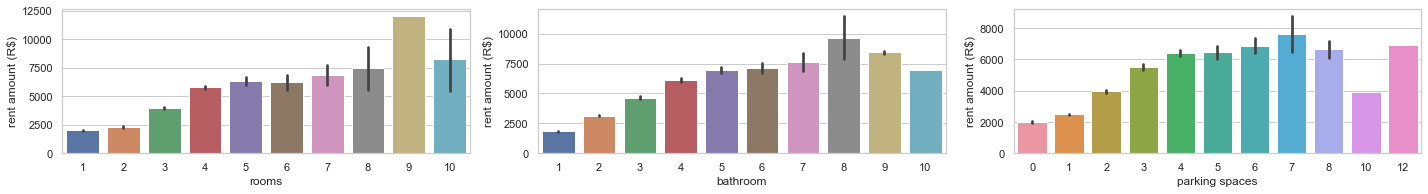

In [41]:
numerical1 = ['rooms', 'bathroom', 'parking spaces']
plt.figure(figsize=(20, 5))
sns.set(style = 'whitegrid')
i = 1
for feature in numerical1:
    plt.subplot(2, 3, i)
    sns.barplot(x = feature, y= 'rent amount (R$)', data=data)
    i+=1
plt.tight_layout()

- Houses with more rooms have more expensive rents, except for houses with 10 rooms when it decreases
- The rent increases until 8 bathrooms, beyond that curiously decreases
- Rent increases until 7 parking spaces, when it behave strangely, probably due to few samples

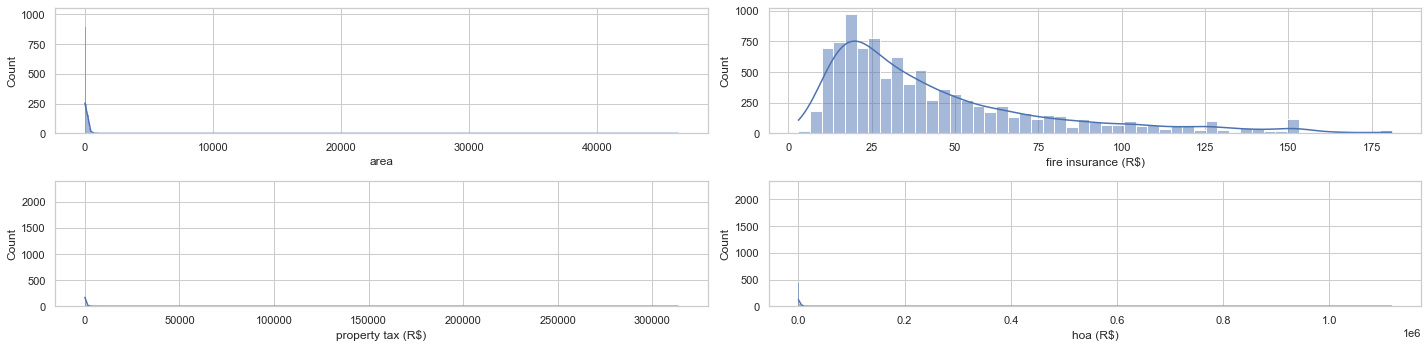

In [43]:
numerical2 = ['area', 'fire insurance (R$)', 'property tax (R$)', 'hoa (R$)']
plt.figure(figsize=(20, 5))
j = 1
for feature2 in numerical2:
    plt.subplot(2, 2, j)
    sns.histplot(data[feature2],kde=True)
    j+=1
plt.tight_layout()

**All the distributions are right skewed**

## Lets take a deeper look about how the prices are distributed in the city's

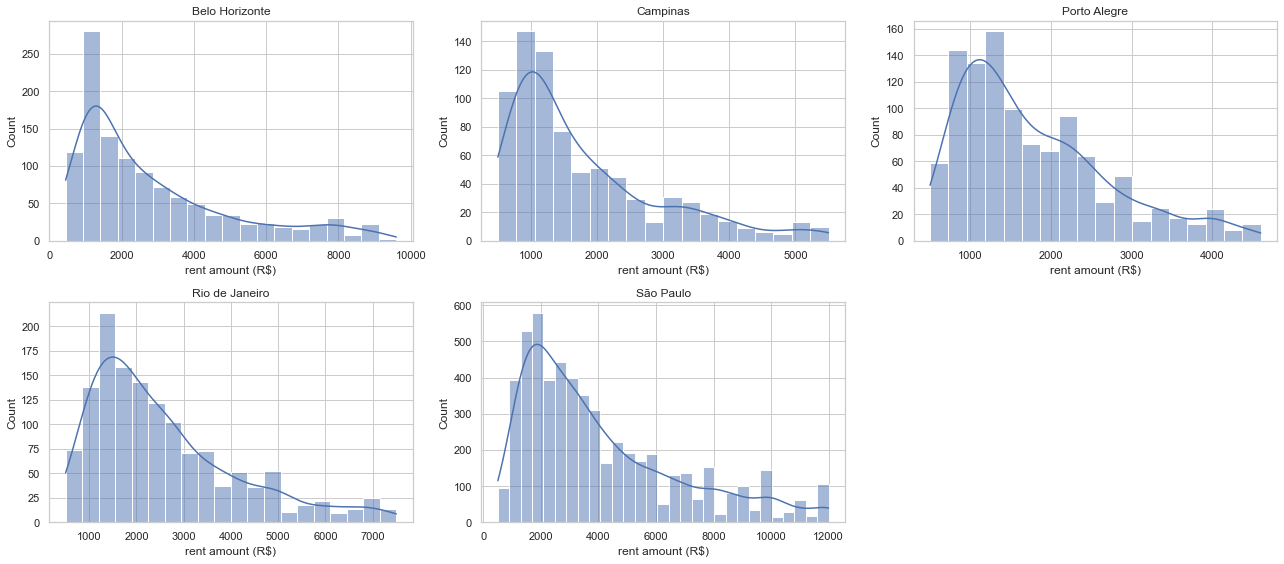

In [44]:
plt.figure(figsize=(18, 8))

i = 1
for city in data['city'].unique():
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = data.loc[data['city'] == city]
    sns.histplot(city_name['rent amount (R$)'],kde=True)
    i+=1
    

plt.tight_layout()
plt.show()

**We can see that we have right skewed distributions.**

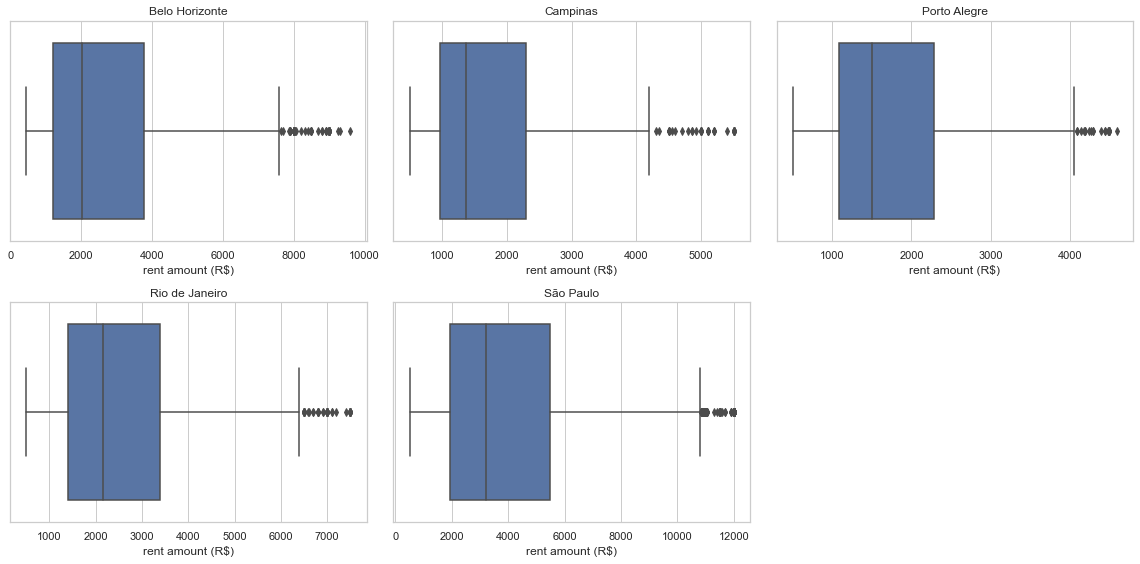

In [50]:
plt.figure(figsize=(16, 8))

i = 1
step = 5000
for city in data['city'].unique():
    if step < 2000:
        step = 2000
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = data.loc[data['city'] == city]
    sns.boxplot(x=city_name['rent amount (R$)'])    
    step-=3000
    i+=1

    

plt.tight_layout()
plt.show()

- São Paulo appear to have the most expensive rent.
- Belo Horizonte and Rio de Janeiro have slightly more expensive rents than Campinas and Porto Alegre.

## Getting the intution about all the categorical features

In [51]:
categorical,numerical = categorize(data.columns)

The numerical features ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']:
The categorical features ['city', 'animal', 'furniture']:


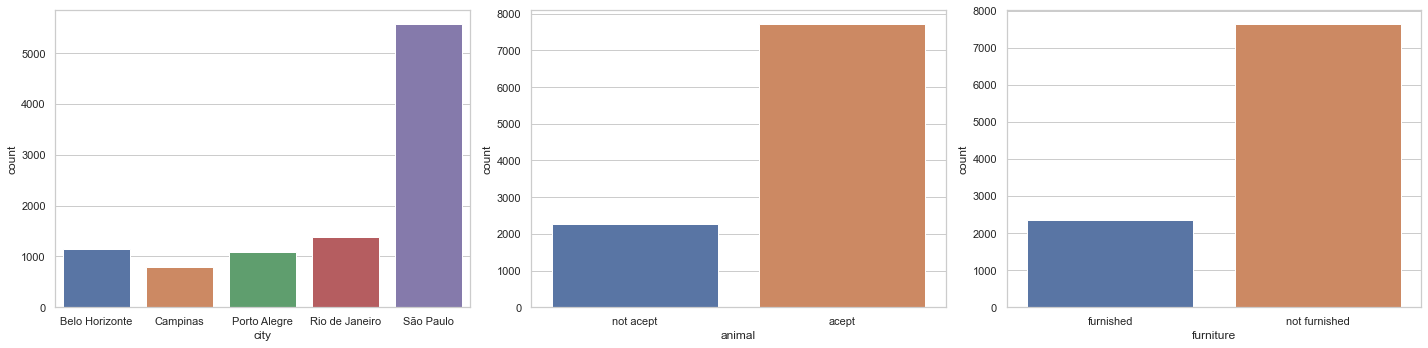

In [53]:
plt.figure(figsize=(20,5))
j =1
for i in categorical:
    plt.subplot(1,3,j)
    sns.countplot(x=data[i])
    j =j+1
plt.tight_layout()

- São Paulo is the city with more houses
- The majority of the houses accept animals
- The majority of the houses are not furnished

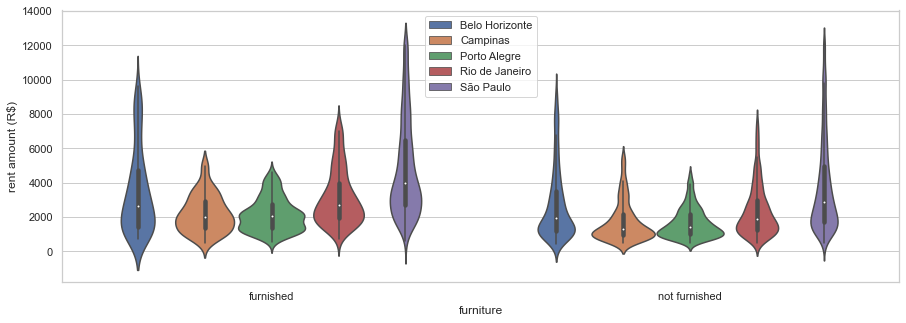

In [54]:
# Let's take a look about how the rent is impacted by the furniture
plt.figure(figsize = (15, 5))
sns.violinplot(x ='furniture', y ='rent amount (R$)', data = data,hue ='city').legend(loc='upper center')

- Furnished houses are more expensive than not furnished
- Furnished houses are more distributed than not furnished houses

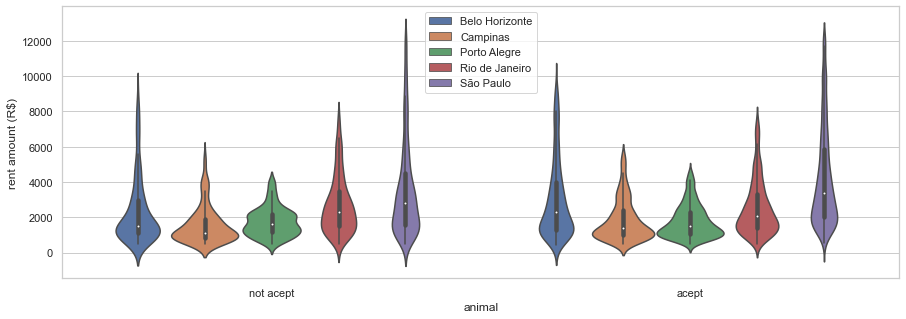

In [56]:
# Let's take a look about how the rent is impacted by the animal acceptance
plt.figure(figsize = (15, 5))
sns.violinplot(x ='animal', y ='rent amount (R$)', data = data,hue ='city').legend(loc='upper center')

**Seems like the animal acceptance have little impact on the rent.**

<AxesSubplot:>

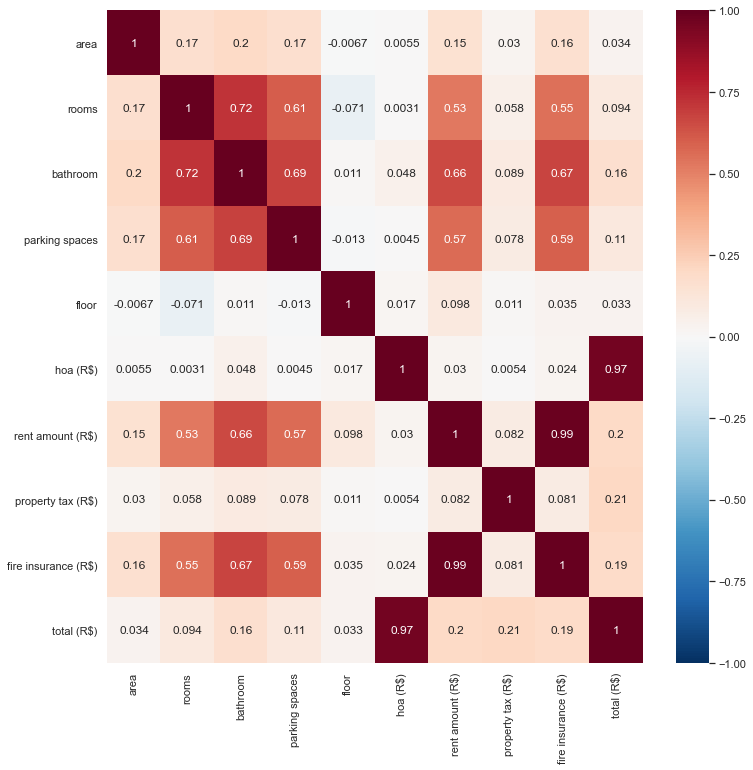

In [57]:
# now let's see the correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', linecolor='black',vmin=-1, vmax=1)

## Lets split and transform our data into train and test

In [58]:
cols = ['city', 'rooms', 'bathroom', 'parking spaces', 'fire insurance (R$)',
        'furniture']
x = data[cols]
y = data['rent amount (R$)']

**We used the columns that have more correlation with the variable that we want to predict**

In [61]:
labelencoder = LabelEncoder()
x.loc[:, 'furniture'] = labelencoder.fit_transform(x.loc[:, 'furniture'])

**We used labelencoder for furniture because only have two values**

In [62]:
dummy = pd.get_dummies(x, columns=['city'])
dummy.drop(columns = ['city_Belo Horizonte'], inplace=True)
x = dummy

**For the citys we use OneHotEncoder and drop the first column to avoid the dummy variable trap**

In [63]:
# Now we split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 0)

## Model Predictions

Here we are going to set the models that we want use and the parameters we want to adopt. In this notebook I will use:

- Linear Regression
- Ridge Regression
- Decision Tree
- Random Forest
- Support Vector Regression (SVR)
- KNearestNeighbours (KNN)
- Lasso Regression
- GridSearch to find the best parameters on Lasso and Ridge

In [65]:
# we create a list to storage all the results for later visualization
acc = []
# parameters are the alpha's that we will use to perform the GridSearch
parameters1= [{'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
# on the regressors we define the models that we want use
regressors = {'Linear Regression': LinearRegression(),
              'Ridge Model': Ridge(alpha=0.1),
              'Decision Tree': DecisionTreeRegressor(),
              'Random Forest': RandomForestRegressor(random_state=1),
              'SVR': SVR(),
              'KNN': KNeighborsRegressor(),
              'Lasso': Lasso(),
              'GridSearchRidge': GridSearchCV(Ridge(), parameters1, cv=4),
              'GridSearchLasso': GridSearchCV(Lasso(), parameters1, cv=4)
             }

In [66]:
# now we perform a loop with each regressor to perform the model, predict the rent 
# and extract the metrics
for i in regressors:
    model = regressors.get(i)
    # here we create a condition because for grid we want to perform the model with the best estimator
    if i == 'GridSearchRidge' or i == 'GridSearchLasso':
        model.fit(x_train, y_train).best_estimator_
    else:
        model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    print(i)
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print('R2:', r2_score(y_test, prediction))
    print('*' * 40)
    acc.append([i, mean_absolute_error(y_test, prediction), np.sqrt(mean_squared_error(y_test, prediction)), r2_score(y_test, prediction)])

Linear Regression
MAE: 248.9928944958645
RMSE: 372.61524993623084
R2: 0.9784355635656989
****************************************
Ridge Model
MAE: 248.98912238422673
RMSE: 372.6154941918053
R2: 0.9784355352939869
****************************************
Decision Tree
MAE: 140.8930896733968
RMSE: 346.66621786820036
R2: 0.9813344880080079
****************************************
Random Forest
MAE: 138.56658264274424
RMSE: 289.09334903245565
R2: 0.9870194509399147
****************************************
SVR
MAE: 967.9108643603793
RMSE: 1802.1468969150171
R2: 0.49557426076295563
****************************************
KNN
MAE: 160.46795856999665
RMSE: 315.0206757145174
R2: 0.9845867231272063
****************************************
Lasso
MAE: 247.54779770272785
RMSE: 372.8201183393924
R2: 0.9784118442672647
****************************************
GridSearchRidge
MAE: 248.95527069031556
RMSE: 372.6177481766284
R2: 0.9784352744024033
****************************************
GridSearchLass

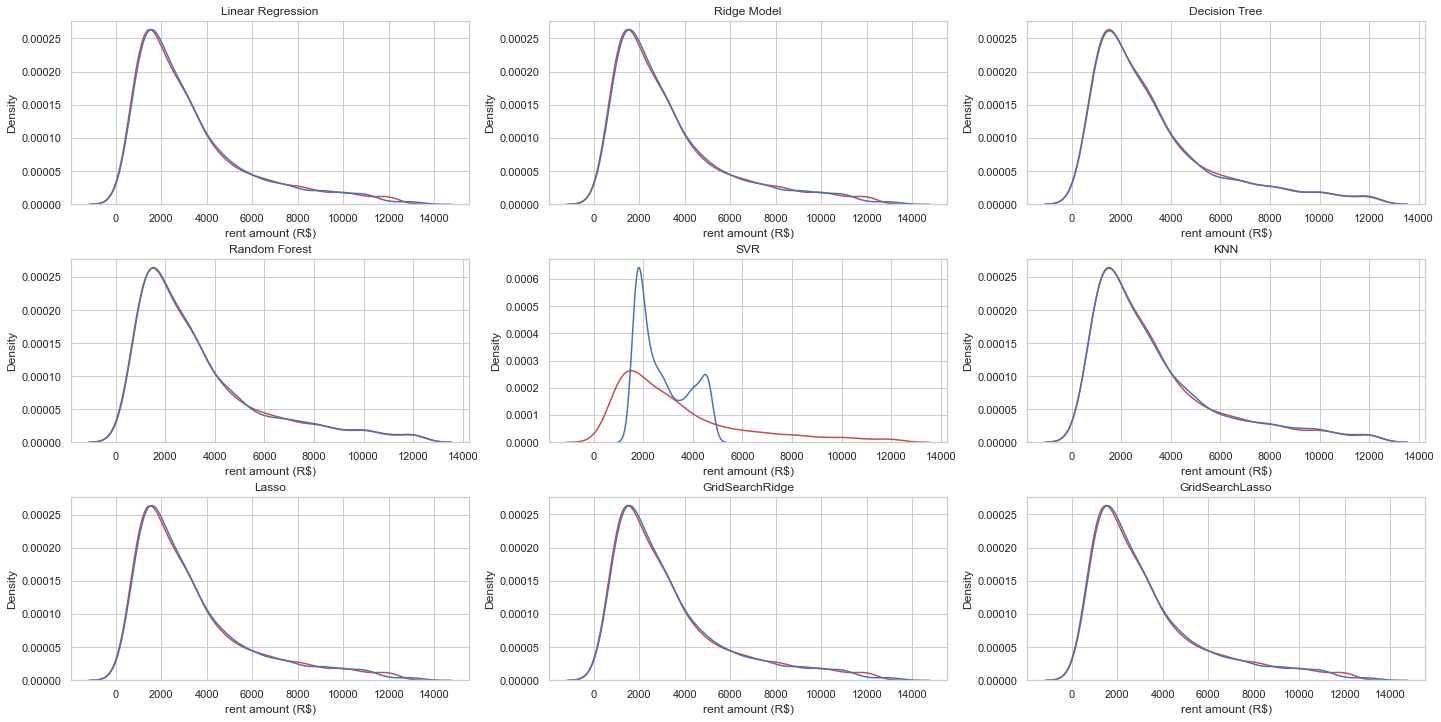

In [73]:
# now let's follow the same loop and visualize the plot's for each regressor
j = 1
plt.figure(figsize=(20,10))
for i in regressors:
    model = regressors.get(i)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    plt.subplot(3, 3, j)
    plt.title(i)
    ax1 = sns.kdeplot(y_test,color ="r",label ="Actual Value")
    sns.kdeplot(prediction ,color ="b",label = "Predicted Value",ax =ax1).set_title(i)
    j+=1
plt.tight_layout(pad = 0.5)

**Since our accuracy is very high, the curves are overlapted**

## Analysis of the results

In [75]:
# lets sort our list of results and transform into a dataframe
acc.sort(key = lambda y:y[3], reverse=True)
acc = pd.DataFrame(data = acc, columns=['model', 'MAE', 'RMSE', 'R2'])

In [76]:
# now let's visualize it
acc.head(len(regressors))

,model,MAE,RMSE,R2
0,Random Forest,138.566583,289.093349,0.987019
1,KNN,160.467959,315.020676,0.984587
2,Decision Tree,140.893090,346.666218,0.981334
3,Linear Regression,248.992894,372.615250,0.978436
4,GridSearchLasso,248.992745,372.615261,0.978436
5,Ridge Model,248.989122,372.615494,0.978436
6,GridSearchRidge,248.955271,372.617748,0.978435
7,Lasso,247.547798,372.820118,0.978412
8,SVR,967.910864,1802.146897,0.495574


**RandomForest it's our best perfomer in all three metrics**

Text(0.5, 1.0, 'R^2 Using Test Data')

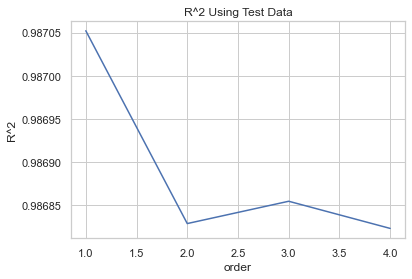

In [78]:
# since RandomForest it's our best model, let's perform a rsquare test with differents
# degrees of polynomial transformation to see if we can improve it
rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train, y_train)
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train)
    
    x_test_pr = pr.fit_transform(x_test)    
    
    rfr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(rfr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')